## Step 1:
Import pandas, seaborn and matplotlib and the data file

In [2]:
import pandas as pd
import seaborn as sns
print(sns.__version__)
import matplotlib.pyplot as plt
flying_etiquette = pd.read_csv('flying-etiquette.csv')

0.13.2


## Step 2:
Use .head() and .info() to see column names and dtypes of data in file

In [4]:
flying_etiquette.head()

,RespondentID,How often do you travel by plane?,Do you ever recline your seat when you fly?,How tall are you?,Do you have any children under 18?,"In a row of three seats, who should get to use the two arm rests?","In a row of two seats, who should get to use the middle arm rest?",Who should have control over the window shade?,Is itrude to move to an unsold seat on a plane?,"Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?",...,Is itrude to wake a passenger up if you are trying to walk around?,"In general, is itrude to bring a baby on a plane?","In general, is it rude to knowingly bring unruly children on a plane?",Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?,Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?,Gender,Age,Household Income,Education,Location (Census Region)
0,3436139758,Once a year or less,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3434278696,Once a year or less,About half the time,"6'3""",Yes,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"No, not at all rude","No, not at all rude","No, not at all rude",No,No,Male,30-44,NaN,Graduate degree,Pacific
2,3434275578,Once a year or less,Usually,"5'8""",No,Whoever puts their arm on the arm rest first,The arm rests should be shared,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$100,000 - $149,999",Bachelor degree,Pacific
3,3434268208,Once a year or less,Always,"5'11""",No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$0 - $24,999",Bachelor degree,Pacific
4,3434250245,Once a month or less,About half the time,"5'7""",No,The person in the middle seat gets both arm rests,The person in aisle,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",Yes,No,Male,30-44,"$50,000 - $99,999",Bachelor degree,Pacific


In [5]:
flying_etiquette.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 27 columns):
 #   Column                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                    --------------  ----- 
 0   RespondentID                                                                                                                              1040 non-null   int64 
 1   How often do you travel by plane?                                                                                                         1040 non-null   object
 2   Do you ever recline your seat when you fly?                                                                                               858 non-null    object
 3   How tall are you?                                         

## Step 3: 
Change "Under 5 ft.” to 5’0" and change 6’6” and above to 6’6”. Replace the “Height (Inches)” column, converting the feet and inches to an integer of total inches

In [7]:
flying_etiquette['How tall are you?'] = flying_etiquette['How tall are you?'].replace({'Under 5 ft.': "5'0\"",'6\'6" and above': "6\'6\""})

In [8]:
flying_etiquette['How tall are you?'].unique()

array([nan, '6\'3"', '5\'8"', '5\'11"', '5\'7"', '5\'9"', '6\'2"',
       '6\'0"', '5\'6"', '6\'1"', '5\'10"', '5\'5"', '6\'4"', '6\'6"',
       '5\'0"', '6\'5"', '5\'4"', '5\'3"', '5\'1"', '5\'2"'], dtype=object)

In [9]:
def to_inches(height: str | float) -> int | float:
    if pd.isna(height):
        return height
    [feet, inches] = height.split("'")
    [inches, _] = inches.split('"')
    return (int(feet) * 12) + int(inches)
flying_etiquette['How tall are you?'] = flying_etiquette['How tall are you?'].apply(to_inches)

In [10]:
flying_etiquette['How tall are you?'].unique()

array([nan, 75., 68., 71., 67., 69., 74., 72., 66., 73., 70., 65., 76.,
       78., 60., 77., 64., 63., 61., 62.])

In [11]:
flying_etiquette['Height (Inches)'] = flying_etiquette['How tall are you?']

## Step 4:
Create reports

In [13]:
# Percent breakdown of survey participants by age range
flying_etiquette.Age.unique()

array([nan, '30-44', '18-29', '45-60', '> 60'], dtype=object)

[Text(0.5, 1.0, 'Percent of Participants by Age Range')]

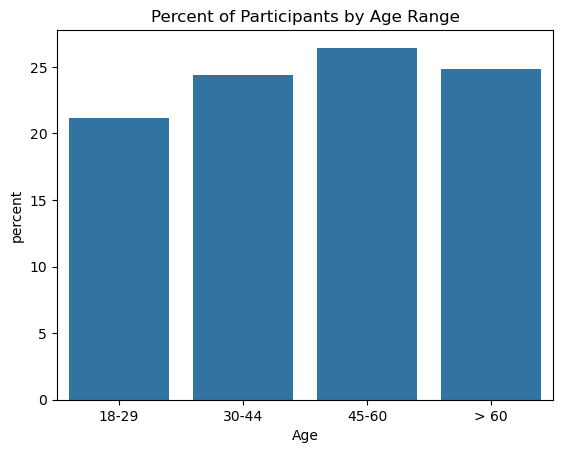

In [14]:
age_order = ['18-29', '30-44', '45-60', '> 60']
sns.countplot(flying_etiquette, x='Age', stat="percent", order=age_order).set(title='Percent of Participants by Age Range')

[Text(0.5, 1.0, 'Is it rude to give up your seat')]

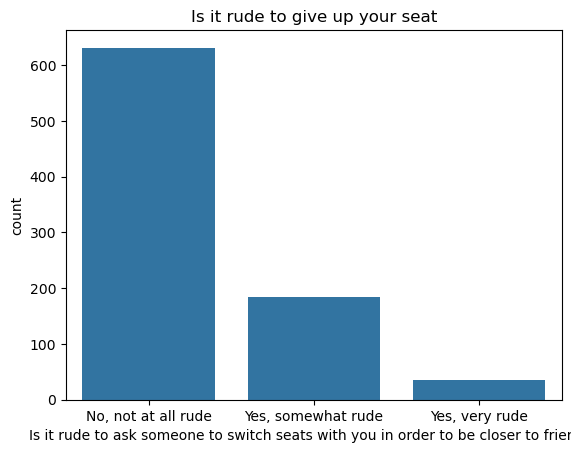

In [15]:
sns.countplot(flying_etiquette, x='Is it rude to ask someone to switch seats with you in order to be closer to friends?', 
              stat="count").set(title='Is it rude to give up your seat')

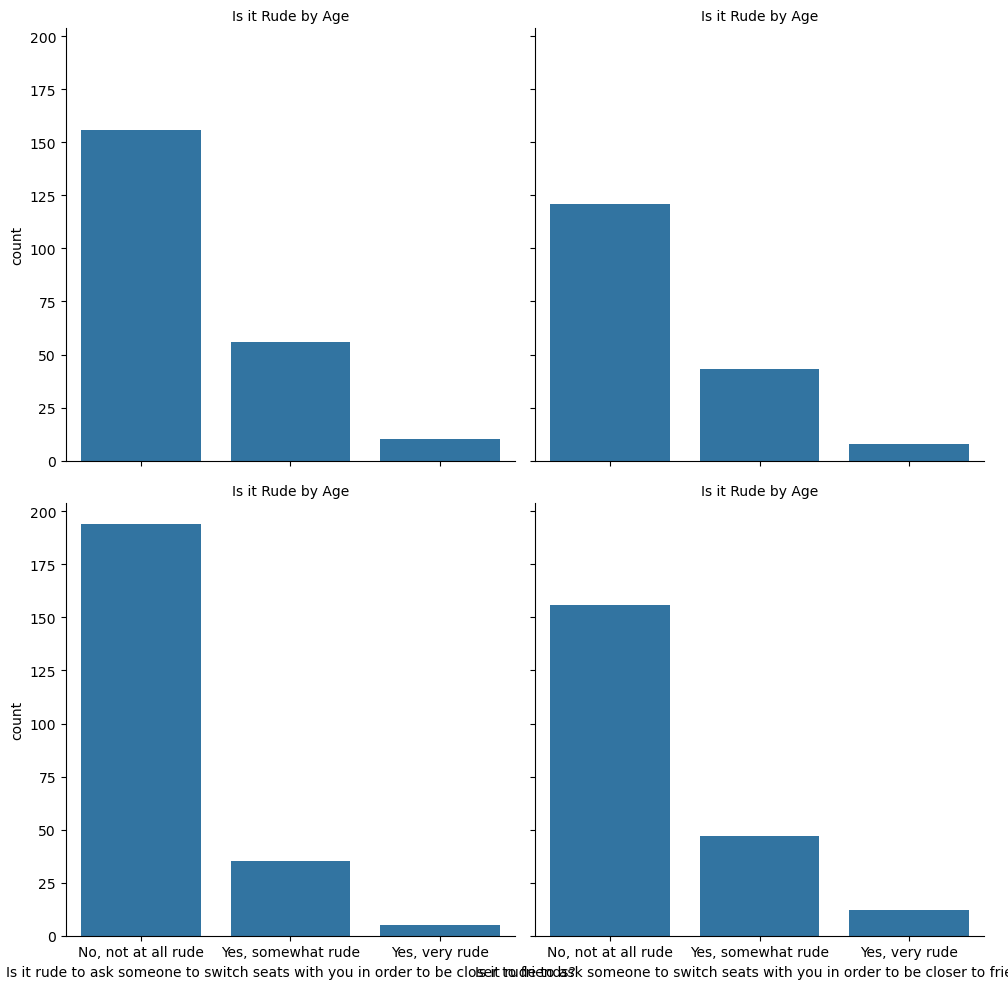

In [38]:
graphs = sns.catplot(data=flying_etiquette, x='Is it rude to ask someone to switch seats with you in order to be closer to friends?', kind='count', 
            col='Age', col_wrap=2)

graphs.set_titles('Is it Rude by Age')

Text(0.5, 1.0, 'Do You Recline by Height')

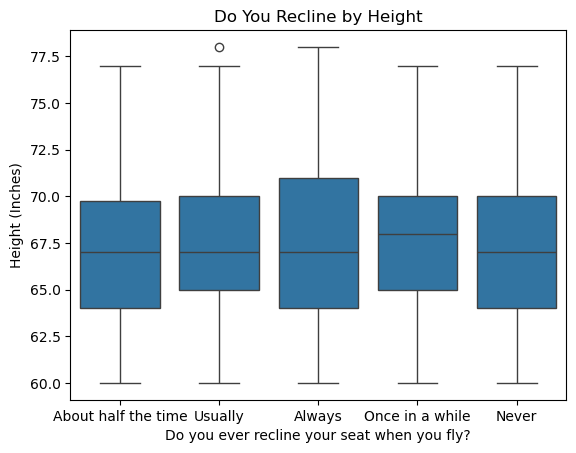

In [32]:
fig, ax = plt.subplots()

sns.boxplot(x='Do you ever recline your seat when you fly?', y='Height (Inches)', data=flying_etiquette)

ax.set_title('Do You Recline by Height')